# EXPLORATORY DATA ANALYSIS in Python

**Step 1** Treatment of Missing Values and Outliers (Preparation of the dataset for analysis by the treatment of the irregularities.)

**Step 2** Draw meaningful patterns and insights with the help of data visualization to summarize their main characteristics.

In [2]:
# importing the basic packages of Python and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files

In [8]:
uploaded= files.upload()

Saving housing.csv to housing.csv


In [11]:
df = pd.read_csv("housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [12]:
# getting the details of raw Housning Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


There are 14 variables in this dataset of which 6 of them contain missing values.

In [13]:
# Getting the first 10 rows of the dataset
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [14]:
# Get the basic statistical summary of the variables present in the given raw data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# Getting its dimension
df.shape

(506, 14)

In [16]:
# obtain the missing values present in the given raw Housing Data
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [17]:
# Six variables among them, having 20 missing values in each case
# Approximately, 4 percent observations in each variable has missing values
(20/506)*100

3.9525691699604746

In [18]:
# getting the column names of the dataset
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

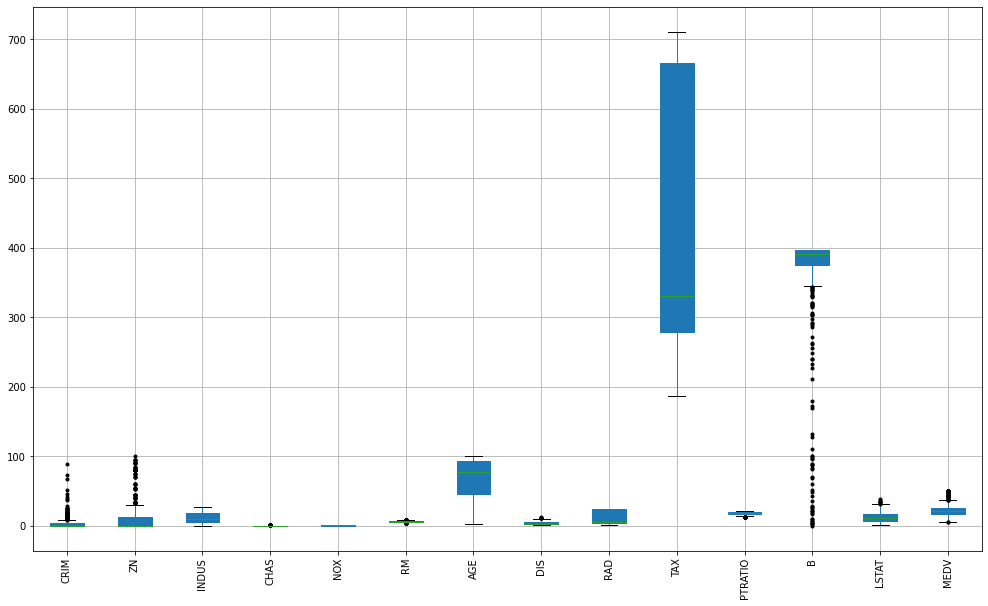

In [19]:
# Importing the visualization package of Python
import matplotlib.pyplot as plt
import seaborn as sns
# Detection of outliers among all variables

%matplotlib inline
plt.subplots(figsize=(17,10))
df.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [20]:
# Variables containing Missing values are
# "CRIM", "ZN" , "INDUS", "CHAS", "AGE", "LSTAT"
# ..............................................
# Variables containing Outliers
# Numerical Variables: "CRIM", "ZN" , "RM", "DIS", "PTRATIO", "B", "LSTAT","MEDV"

At first, we will go with the treatment of missing values and then after outliers.
Now, The treatment of the missing values on the basis of the presence of the Outliers.
There are six variables containing missing values.

***PHASE 1: TREATMENT OF MISSING VALUES***

***Separate all six variables contain missing values into three groups on the basis of the presence of outliers.***
1. cat_mv = Categorical variable conatining missing values (Missing values will be treated with ***mode***)--- "CHAS"
2. num_mv_out = Numerical variables containing missing values and outliers too (Missing values will be treated with ***median***)--- "CRIM", "ZN" ,"LSTAT"
3. num_mv_noOut = Numerical variables containing missing values but "no outliers" (Missing values will be treated with ***mean***)--- "INDUS", "AGE"

***Initiate the treatment of Missing Values***

In [21]:
# For first category: "cat_mv_out"
cat_mv = pd.concat([df["CHAS"]],axis=1)

In [22]:
cat_mv

,CHAS
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
501,0.0
502,0.0
503,0.0
504,0.0


In [23]:
cat_mv.isnull().sum()

CHAS    20
dtype: int64

In [24]:
cat_mv.mode()

,CHAS
0,0.0


In [25]:
# Replacing the missing values with mode(value 0) to this categorical variable
# replace nan value to zero(mode = 0)
cat_mv.replace(np.nan, 0, inplace=True)

In [26]:
# After replacing with mode(Value = 0), now there is no missing values in this categorical variable
cat_mv.isnull().sum()

CHAS    0
dtype: int64

In [27]:
# dimension (506 Observations and 1 column)
cat_mv.shape

(506, 1)

In [28]:
# For the second category: "num_mv_out" means Numerical variables containing missing values and outliers too
num_mv_out = pd.concat([df["CRIM"], df["ZN"], df["LSTAT"]],axis=1)

In [29]:
num_mv_out.isnull().sum()

CRIM     20
ZN       20
LSTAT    20
dtype: int64

Each variable has missing values equal to 20 obs

In [30]:
num_mv_out.describe()

,CRIM,ZN,LSTAT
count,486.000000,486.000000,486.000000
mean,3.611874,11.211934,12.715432
std,8.720192,23.388876,7.155871
min,0.006320,0.000000,1.730000
25%,0.081900,0.000000,7.125000
50%,0.253715,0.000000,11.430000
75%,3.560263,12.500000,16.955000
max,88.976200,100.000000,37.970000


In [31]:
# Replacing the missing values with median of its variables ("num_mv_out")
num_mv_out = num_mv_out.fillna(num_mv_out.median())

In [32]:
# Now, "num_mv_out" has no missing values
num_mv_out.isnull().sum()

CRIM     0
ZN       0
LSTAT    0
dtype: int64

In [33]:
num_mv_out.shape

(506, 3)

In [34]:
# For the third category: "num_mv_noOut" means Numerical variables containing missing values but "no outliers"
num_mv_noOut = pd.concat([df["INDUS"], df["AGE"]],axis=1)

In [ ]:
num_mv_noOut

,INDUS,AGE
0,2.31,65.2
1,7.07,78.9
2,7.07,61.1
3,2.18,45.8
4,2.18,54.2
...,...,...
501,11.93,69.1
502,11.93,76.7
503,11.93,91.0
504,11.93,89.3


In [35]:
num_mv_noOut.isnull().sum()

INDUS    20
AGE      20
dtype: int64

Each variable has missing values equal to 20 obs

In [36]:
# Replacing the missing values with mean of its variable ("num_mv_noOut")
# this category doesn't have outliers but having missing values in the two variables
num_mv_noOut = num_mv_noOut.fillna(num_mv_noOut.mean())

In [ ]:
# Now, this cateory ("num_mv_noOut") has no missing values
num_mv_noOut.isnull().sum()

INDUS    0
AGE      0
dtype: int64

***PHASE 2: TREATMENT OF OUTLIERS*** 

***After treatment of missing values, the dataset will have only outliers problems. So, the next treatment will be for outliers. Now, assign a dataset that will contain all 14 variables including the above three category ("Treated Missing Values" Variables). Finally, split this dataset into three categories. But the thing is, Only the first category will be focussed here because the first category contains outliers. The second and third categories have no outliers.***
1. num_out = Numerical variables containing outliers (Missing values will be treated with ***median***)--- "CRIM", "ZN", "RM", "DIS", "PTRATIO", "B", "LSTAT", "MEDV"
2. num_noOut = Numerical variables containing "no outliers" (Missing values will be treated with ***mean***)--- "INDUS", "NOX", "AGE", "RAD", "TAX"
3. cat_out = Categorical variable conatining no outliers --- "CHAS"---- In this variable, the observation is either 1 or 0

In [37]:
# For assigning or concatenating all the variables including with six treated missing values variables into a dataset
df1 = pd.concat([cat_mv,num_mv_out, num_mv_noOut, df["RM"], df["DIS"], df["PTRATIO"], df["B"], df["MEDV"], df["NOX"], df["RAD"], df["TAX"]],axis=1)

In [38]:
df1

,CHAS,CRIM,ZN,LSTAT,INDUS,AGE,RM,DIS,PTRATIO,B,MEDV,NOX,RAD,TAX
0,0.0,0.00632,18.0,4.98,2.31,65.200000,6.575,4.0900,15.3,396.90,24.0,0.538,1,296
1,0.0,0.02731,0.0,9.14,7.07,78.900000,6.421,4.9671,17.8,396.90,21.6,0.469,2,242
2,0.0,0.02729,0.0,4.03,7.07,61.100000,7.185,4.9671,17.8,392.83,34.7,0.469,2,242
3,0.0,0.03237,0.0,2.94,2.18,45.800000,6.998,6.0622,18.7,394.63,33.4,0.458,3,222
4,0.0,0.06905,0.0,11.43,2.18,54.200000,7.147,6.0622,18.7,396.90,36.2,0.458,3,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.06263,0.0,11.43,11.93,69.100000,6.593,2.4786,21.0,391.99,22.4,0.573,1,273
502,0.0,0.04527,0.0,9.08,11.93,76.700000,6.120,2.2875,21.0,396.90,20.6,0.573,1,273
503,0.0,0.06076,0.0,5.64,11.93,91.000000,6.976,2.1675,21.0,396.90,23.9,0.573,1,273
504,0.0,0.10959,0.0,6.48,11.93,89.300000,6.794,2.3889,21.0,393.45,22.0,0.573,1,273


In [39]:
# No missing values after merging all variables
df1.isnull().sum()

CHAS       0
CRIM       0
ZN         0
LSTAT      0
INDUS      0
AGE        0
RM         0
DIS        0
PTRATIO    0
B          0
MEDV       0
NOX        0
RAD        0
TAX        0
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

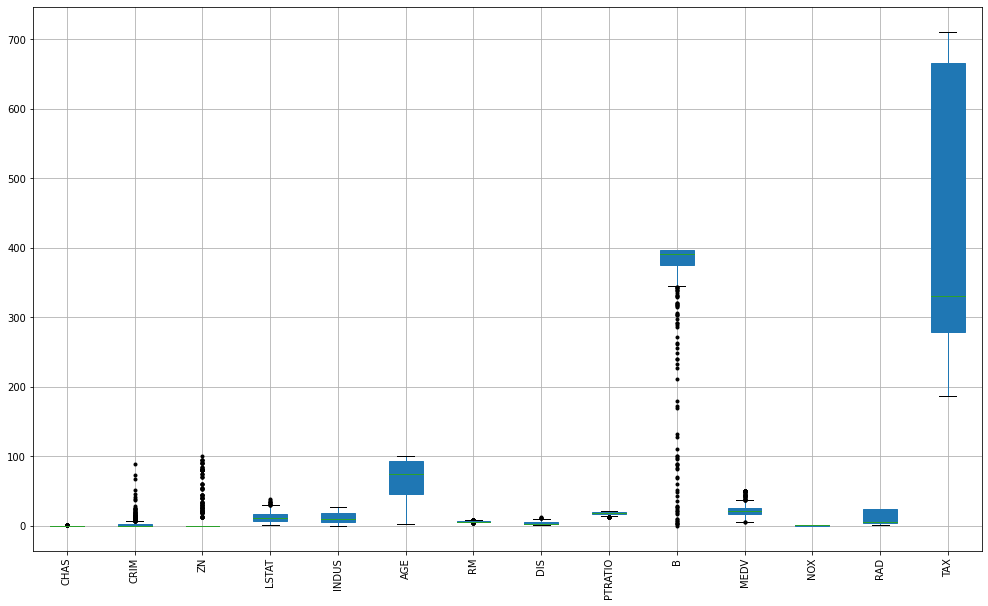

In [40]:
# Boxplot for all variables
plt.subplots(figsize=(17,10))
df1.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

Nine variables containing outliers and remain doesn't have outliers

***Now, It's time for treatment of outliers***
1. num_out = Numerical variables containing outliers (Missing values will be treated with ***median***)--- "CRIM", "ZN", "RM", "DIS", "PTRATIO", "B", "LSTAT", "MEDV"

In [41]:
num_out = pd.concat([df1["CRIM"], df1["ZN"], df1["RM"], df1["DIS"], df1["PTRATIO"], df1["B"], df1["LSTAT"], df1["MEDV"]],axis=1)

In [42]:
num_out

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,6.575,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,6.0622,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,21.0,391.99,11.43,22.4
502,0.04527,0.0,6.120,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,6.976,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,6.794,2.3889,21.0,393.45,6.48,22.0


(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

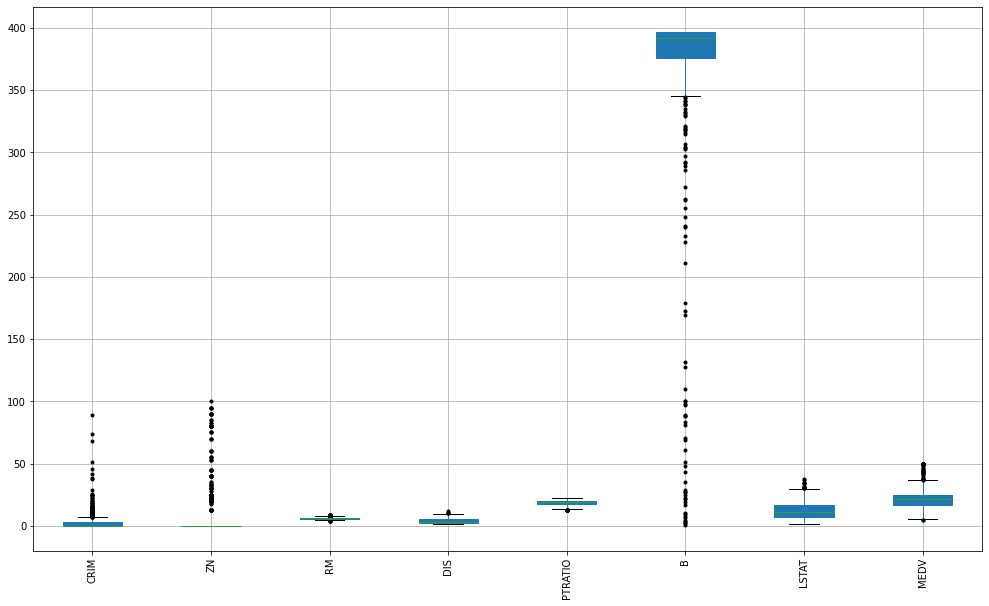

In [43]:
# Detecting outliers in "cat_out"
plt.subplots(figsize=(17,10))
num_out.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [44]:
# Getting the basic statistical summary of those variables containing outliers
num_out.describe()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,6.284634,3.795043,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,0.702617,2.105710,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,3.561000,1.129600,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.885500,2.100175,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,6.208500,3.207450,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,6.623500,5.188425,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,8.780000,12.126500,22.000000,396.900000,37.970000,50.000000


In [45]:
# Detecting and Removing Outliers
# Inter Quartile Range (IQR) is the difference between the 3rd Quartile and the first Quartile
# The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.
def detect_outlier(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75) 
    IQR = Q3 - Q1
    IQR *= 1.5
    minimum = Q1 - IQR 
    maximum = Q3 + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

Using tukey method to remove outliers. Whiskers are set at 1.5 times Interquartile Range (IQR). Any value beyond the acceptance range are considered as outliers. 

***Replacing the outliers with the median value of that feature***

***Why replacing with median value?***

As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.

In [46]:
def  remove_outlier(feature):
    Q1 = np.percentile(num_out[feature], 25)
    Q3 = np.percentile(num_out[feature], 75)
    IQR = Q3 - Q1
    IQR *= 1.5
    
    minimum = Q1 - IQR # the acceptable minimum value
    maximum = Q3 + IQR # the acceptable maximum value
    
    median = num_out[feature].median()
    
    num_out.loc[num_out[feature] < minimum, feature] = median
    num_out.loc[num_out[feature] > maximum, feature] = median

In [47]:
# taking all the column

num_out = num_out.iloc[:, : ]
for i in range(len(num_out.columns)): 
        remove_outlier(num_out.columns[i])

In [48]:
# In "num_out" matrix, it contains all varibles
num_out = num_out.iloc[:, : ]

In [49]:
num_out

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.0,6.575,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,6.0622,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,21.0,391.99,11.43,22.4
502,0.04527,0.0,6.120,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,6.976,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,6.794,2.3889,21.0,393.45,6.48,22.0


In [50]:
# This shows that these are the variables from "num_out" which contain Outliers
for i in range(len(num_out.columns)):
    if(detect_outlier(num_out[num_out.columns[i]])):
        print(num_out.columns[i], "Contains Outlier")

CRIM Contains Outlier
RM Contains Outlier
B Contains Outlier
LSTAT Contains Outlier
MEDV Contains Outlier


In [51]:
# Removing the outliers
for i in range (3):
    for i in range(len(num_out.columns)):
        remove_outlier(num_out.columns[i])

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

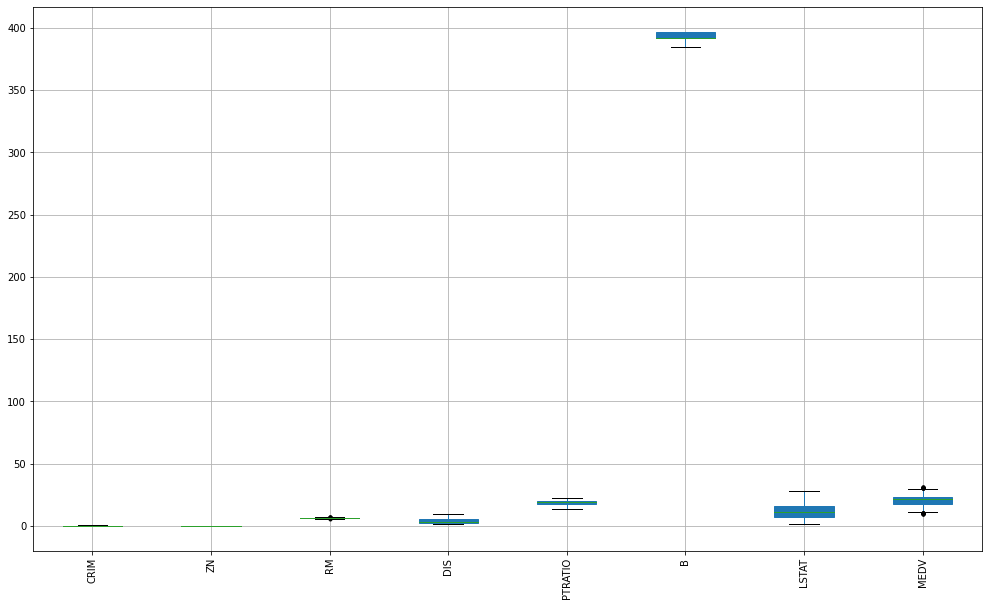

In [52]:
# After removing outliers, the following boxplots of each variable from "num_out" show, they have no more outliers
plt.subplots(figsize=(17,10))
num_out.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [53]:
# Finally, concatenating all variables after treatment of outliers with those varibales that have no outliers into a dataset
final_df = pd.concat([num_out, df1["CHAS"], df1["INDUS"], df1["NOX"], df1["AGE"], df1["RAD"], df1["TAX"]],axis=1)

# After treatment of missing values as well as outliers 
# The dataset is now ready for further analysis

In [54]:
final_df

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV,CHAS,INDUS,NOX,AGE,RAD,TAX
0,0.00632,0.0,6.575,4.0900,15.3,396.90,4.98,24.0,0.0,2.31,0.538,65.200000,1,296
1,0.02731,0.0,6.421,4.9671,17.8,396.90,9.14,21.6,0.0,7.07,0.469,78.900000,2,242
2,0.02729,0.0,7.185,4.9671,17.8,392.83,4.03,21.2,0.0,7.07,0.469,61.100000,2,242
3,0.03237,0.0,6.998,6.0622,18.7,394.63,2.94,21.2,0.0,2.18,0.458,45.800000,3,222
4,0.06905,0.0,7.147,6.0622,18.7,396.90,11.43,21.2,0.0,2.18,0.458,54.200000,3,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,21.0,391.99,11.43,22.4,0.0,11.93,0.573,69.100000,1,273
502,0.04527,0.0,6.120,2.2875,21.0,396.90,9.08,20.6,0.0,11.93,0.573,76.700000,1,273
503,0.06076,0.0,6.976,2.1675,21.0,396.90,5.64,23.9,0.0,11.93,0.573,91.000000,1,273
504,0.10959,0.0,6.794,2.3889,21.0,393.45,6.48,22.0,0.0,11.93,0.573,89.300000,1,273


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

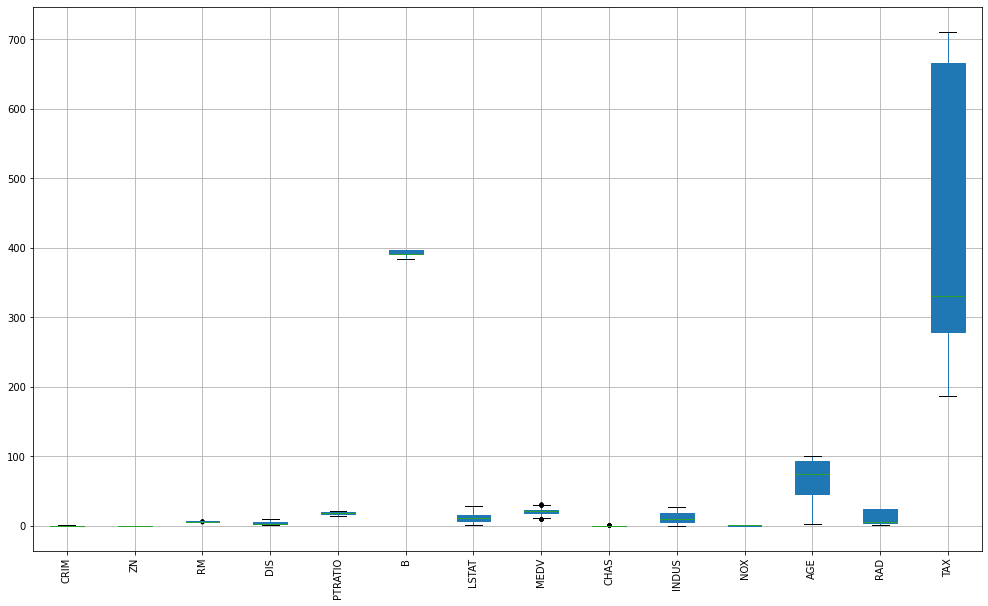

In [55]:
# Boxplot for the final dataset
plt.subplots(figsize=(17,10))
final_df.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

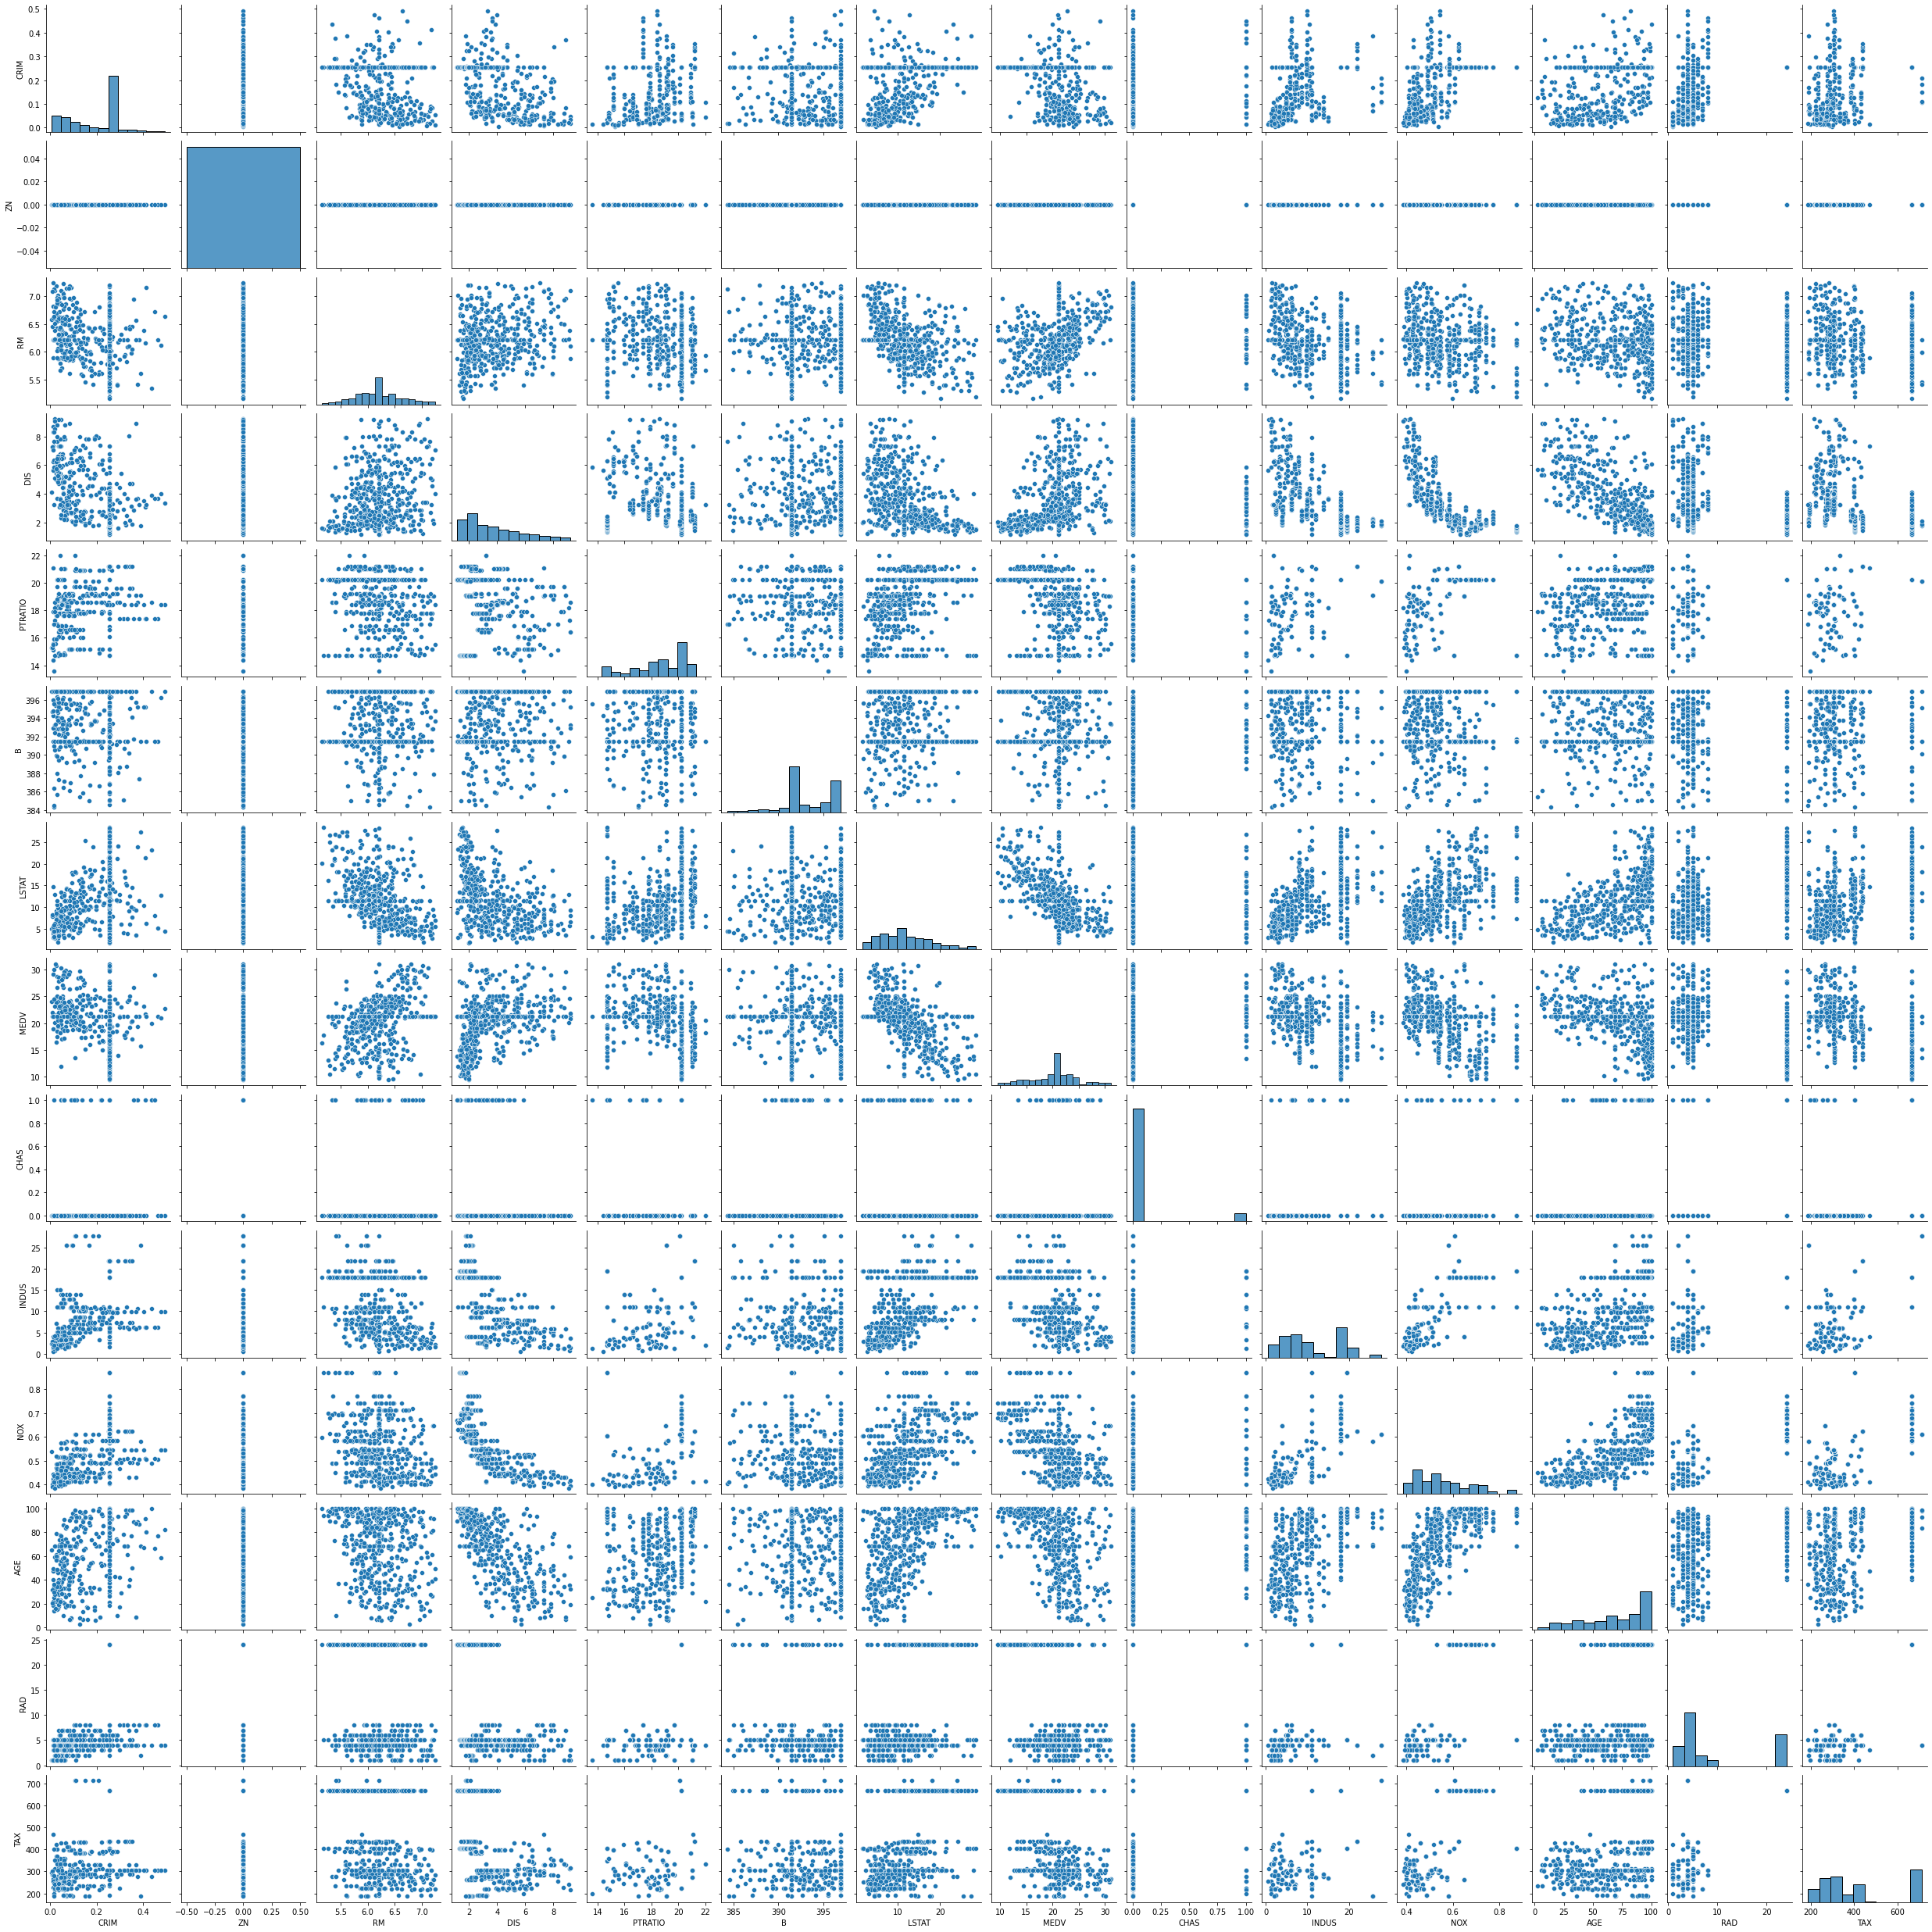

In [56]:
# Here, Correlation matrix shows:
# the relationship among explanatory variables as well as,
# the relationship between the dependent varibale with each of the explanatory variables
sns.pairplot(final_df)

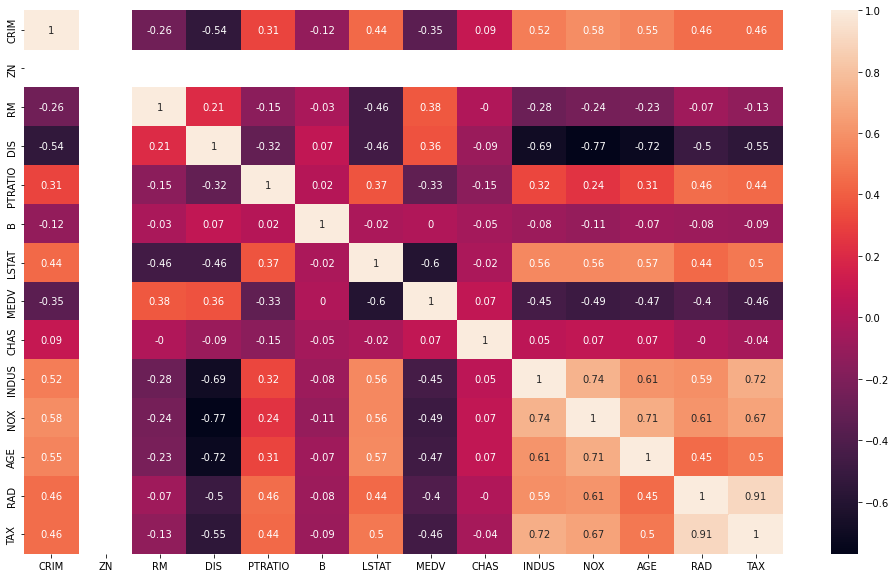

In [57]:
# the heatmap also shows the same things and interpretations which earlier correlation matrix has been shown
fig, ax = plt.subplots(figsize=(17,10))
correlation_matrix = final_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [58]:
# correlation between these variables
print("PEARSON CORRELATION")
print(final_df.corr(method="pearson"))
sns.heatmap(final_df.corr(method="pearson"))
plt.savefig("heatmap_pearson_final.png")
plt.clf()
plt.close()

PEARSON CORRELATION
             CRIM  ZN        RM       DIS   PTRATIO         B     LSTAT  \
CRIM     1.000000 NaN -0.257687 -0.536575  0.312288 -0.118175  0.438881   
ZN            NaN NaN       NaN       NaN       NaN       NaN       NaN   
RM      -0.257687 NaN  1.000000  0.213440 -0.147474 -0.026556 -0.457508   
DIS     -0.536575 NaN  0.213440  1.000000 -0.318626  0.066873 -0.459702   
PTRATIO  0.312288 NaN -0.147474 -0.318626  1.000000  0.022006  0.370460   
B       -0.118175 NaN -0.026556  0.066873  0.022006  1.000000 -0.016643   
LSTAT    0.438881 NaN -0.457508 -0.459702  0.370460 -0.016643  1.000000   
MEDV    -0.345624 NaN  0.375182  0.360643 -0.325026  0.001044 -0.603648   
CHAS     0.094850 NaN -0.001567 -0.087788 -0.147506 -0.051822 -0.021395   
INDUS    0.516031 NaN -0.284044 -0.690586  0.322969 -0.083767  0.559705   
NOX      0.580619 NaN -0.244543 -0.770106  0.236828 -0.114083  0.557853   
AGE      0.548210 NaN -0.225106 -0.724511  0.311055 -0.070126  0.574629   
RAD  

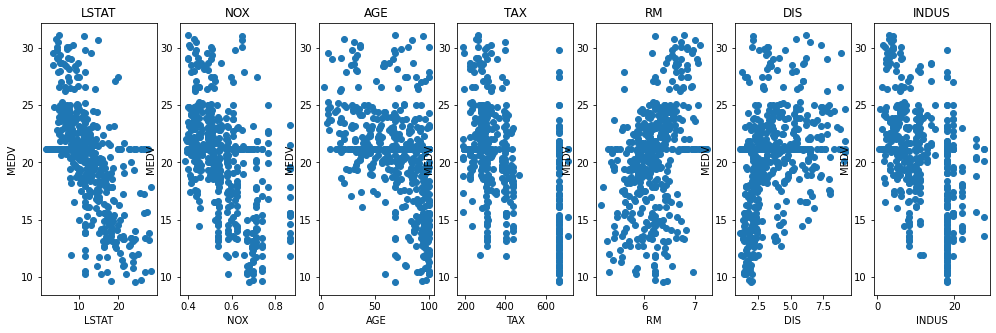

In [59]:
#scatter plot to see how these features RAD, RM ,DIS, LSTAT, NOX, AGE, TAX, INDUS vary with Target variable (MEDV)
plt.figure(figsize=(17,5))

features = ['LSTAT','NOX','AGE','TAX','RM','DIS','INDUS']
target = final_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = final_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')